### This script contains the following:
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering


#### 1. Importing libraries and data and renaming columns

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [155]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [156]:
path = r'C:\Users\tee3a\3D Objects\Project 6'
df_airline = pd.read_csv(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'flavors_of_cacao_visuals.csv'), index_col = False)

In [157]:
#### Data cleaning and Wrangling 
df4 = df_airline.drop(columns = ['Unnamed: 0'])
df4_clean =  df4[df4['Broad Bean Origin'].isnull() == True]
df4_clean = df4[df4['Broad Bean Origin'].isnull() == False]

In [158]:
# Create a subset
data_to_plot2 = df4_clean[['Cocoa Percent' , 'Review Date' , 'REF' , 'Rating']]
data_to_plot2.shape

(1792, 4)

In [159]:
data_to_plot2.rename(columns = {"Cocoa Percent" : "Percent", "Review Date": "Date", "REF": "Ref", "Rating": "Ratings"}, inplace=True)

C:\Users\tee3a\AppData\Local\Temp\ipykernel_9688\1655080254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot2.rename(columns = {"Cocoa Percent" : "Percent", "Review Date": "Date", "REF": "Ref", "Rating": "Ratings"}, inplace=True)


#### 2. The elbow technique

In [160]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [161]:
score = [kmeans[i].fit(data_to_plot2).score(data_to_plot2) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.
score   

C:\Users\tee3a\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[-548796620.0784041,
 -139937250.6397509,
 -62936499.30075137,
 -34965288.00673571,
 -22349356.89498965,
 -15700970.144120794,
 -11427010.703879321,
 -8805693.634193795,
 -7036943.806458296]

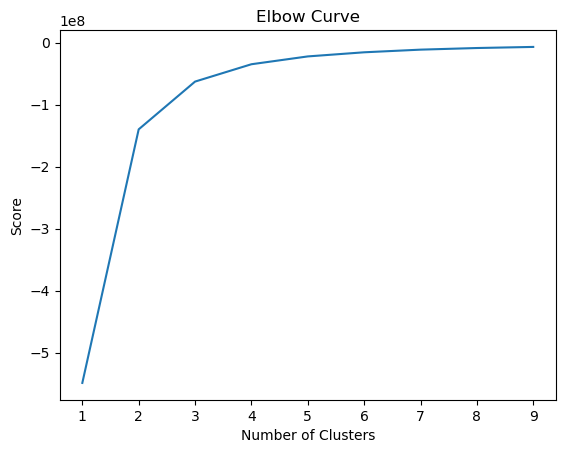

In [162]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this elbow, the optimal number of clusters is 3.  After the third one on the x-axis,  the curve straightens out. This means that the optimal count for your clusters is three.

#### 3. k-means clustering

In [163]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [164]:
# Fit the k-means object to the data.
kmeans.fit(data_to_plot2)


KMeans(n_clusters=3)

In [165]:
data_to_plot2['clusters'] = kmeans.fit_predict(data_to_plot2)

C:\Users\tee3a\AppData\Local\Temp\ipykernel_9688\833952480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot2['clusters'] = kmeans.fit_predict(data_to_plot2)


In [166]:
data_to_plot2.head()

,Percent,Date,Ref,Ratings,clusters
0,63.0,2016,1876,3.75,1
1,70.0,2015,1676,2.75,1
2,70.0,2015,1676,3.00,1
3,70.0,2015,1680,3.50,1
4,70.0,2015,1704,3.50,1


In [167]:
data_to_plot2['clusters'].value_counts()

1    652
0    608
2    532
Name: clusters, dtype: int64

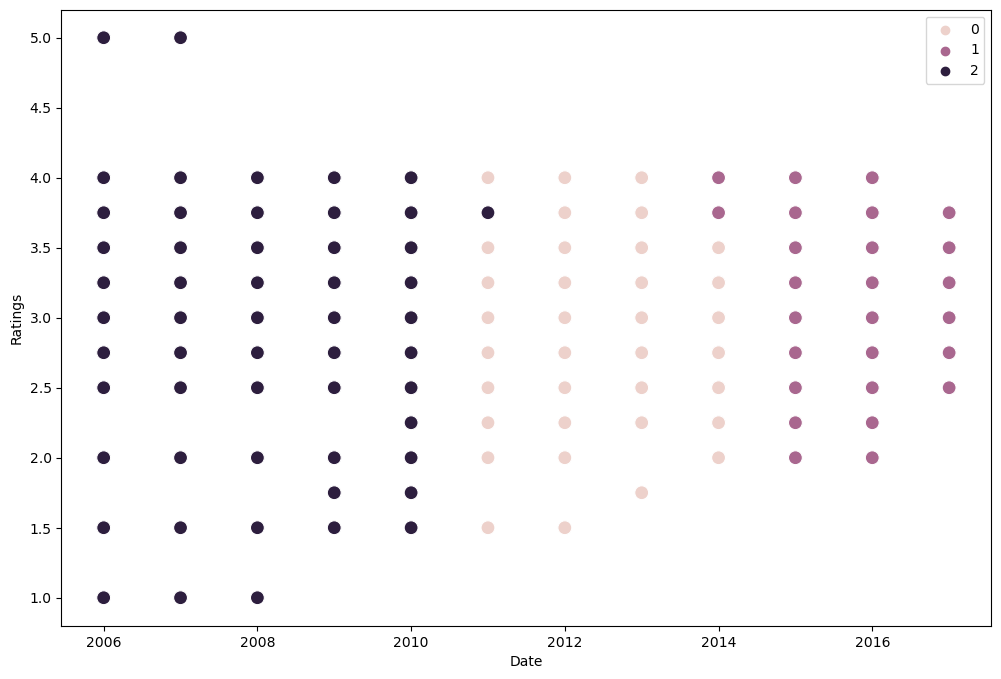

In [168]:
# Plot the clusters for the "Date" and "Ratings" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_to_plot2['Date'], y=data_to_plot2['Ratings'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Date')
plt.ylabel('Ratings') 
plt.show()

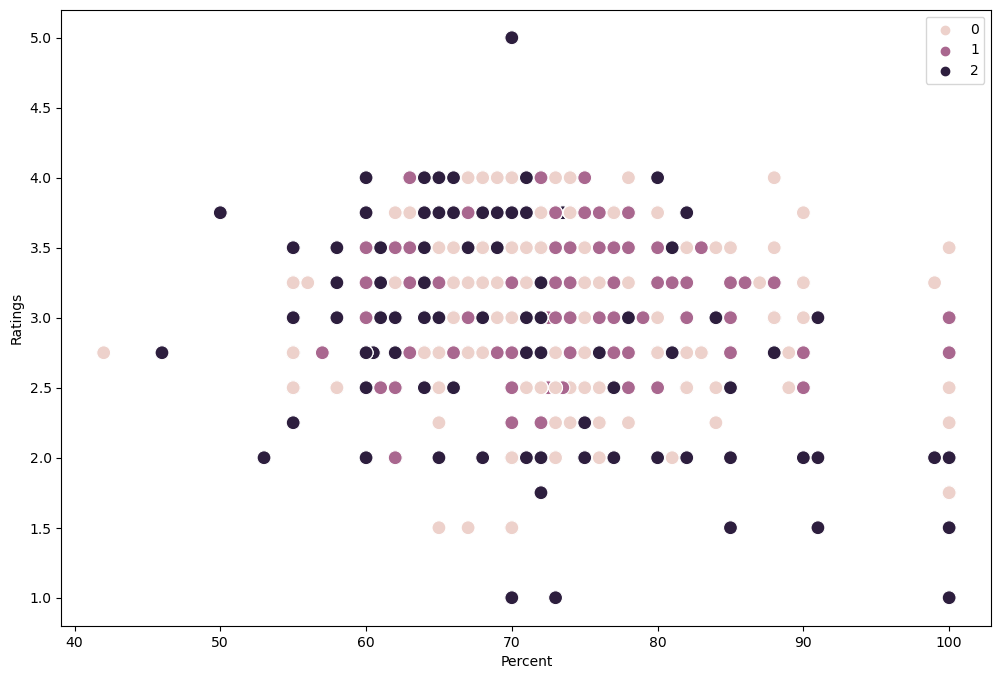

In [169]:
# Plot the clusters for the "Ratings" and "Percent" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_to_plot2['Percent'], y=data_to_plot2['Ratings'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent') # Label x-axis.n"
plt.ylabel('Ratings') # Label y-axis.n"
plt.show()

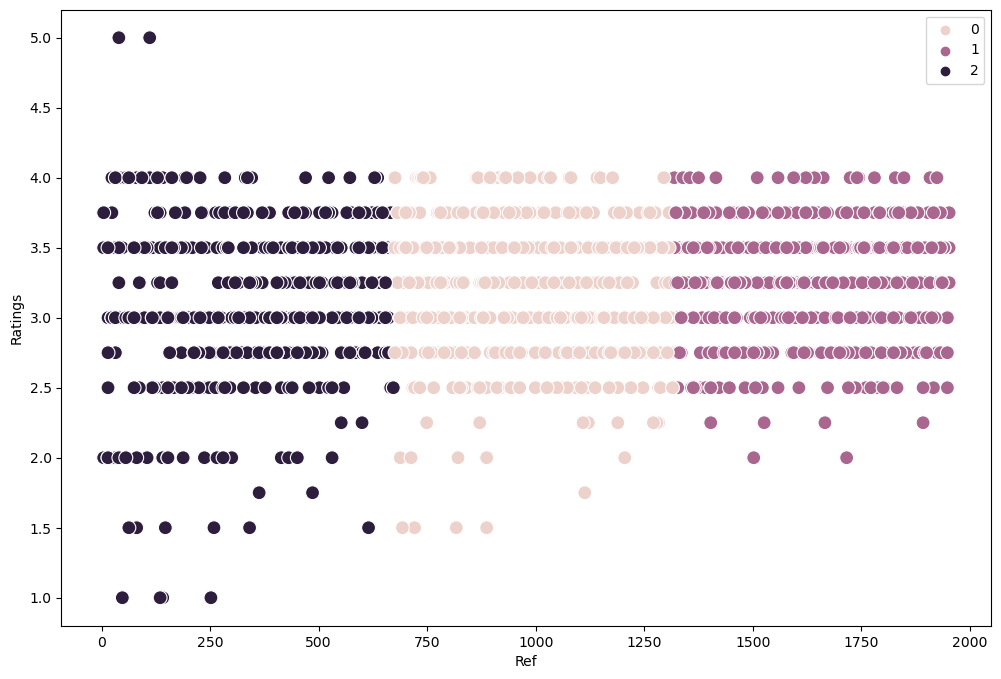

In [170]:
# Plot the clusters for the "Ref" and "Rating" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_to_plot2['Ref'], y=data_to_plot2['Ratings'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Ref')
plt.ylabel('Ratings') 
plt.show()


#### The plot 'Date vs Rating' has a well divided clusters, showing that the chocolate Rating may be according to the Review date.
#### The plot 'Ratings vs Percent' shows there is no relationship between the the Percentage of cacao in the chocolate and the Rating, because all the colors overlap.
#### The plot 'Ref vs Rating' has a well divided clusters, showing that the Rating may be according to the Reference.

In [171]:
# Group by colors
data_to_plot2.loc[data_to_plot2['clusters'] == 2, 'cluster'] = 'dark purple'
data_to_plot2.loc[data_to_plot2['clusters'] == 1, 'cluster'] = 'purple'
data_to_plot2.loc[data_to_plot2['clusters'] == 0, 'cluster'] = 'pink'


C:\Users\tee3a\AppData\Local\Temp\ipykernel_9688\3128379914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot2.loc[data_to_plot2['clusters'] == 2, 'cluster'] = 'dark purple'


In [172]:
# Examine descriptive cluster statistics
data_to_plot2.groupby('cluster').agg({'Percent':['mean', 'median'], 
'Date':['mean', 'median'], 
'Ref':['mean', 'median'],
'Ratings':['mean', 'median']})

Percent                Date                  Ref          \
                  mean median         mean  median         mean  median   
cluster                                                                   
dark purple  71.180451   70.0  2008.543233  2009.0   344.107143   341.0   
pink         72.019737   70.0  2012.524671  2013.0  1002.421053  1011.0   
purple       71.850460   70.0  2015.217791  2015.0  1630.555215  1626.0   

              Ratings         
                 mean median  
cluster                       
dark purple  3.119361   3.00  
pink         3.183799   3.25  
purple       3.241181   3.25

#### The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. It would maybe provide a more holistic view on what in fact influences the Operating Profit variable.

In [173]:
#### Exporting the data
data_to_plot2.to_pickle(os.path.join(path, 'flavors_of_cacao_clustering.pkl'))